 ===================================================================================================================
 
 ## Stokes' Theorem ##
 
 **With Python SymPy**
 
The next Examples and Practice Problems and their images come from **Paul Dawkins** excellent lecture notes: http://tutorial.math.lamar.edu/index.aspx, where you can the find the underlying theory of calculations and the detailed 'paper and pen' solutions. To use this material you must read *'Terms of Use'* from https://tutorial.math.lamar.edu/Terms.aspx.

====================================================================================================================


**Stoke’s Theorem.** Let *S* be an oriented smooth surface that is bounded by a simple, closed, smooth boundary curve *C* with positive orientation. Also let $\vec{F}$ be a vector field then,  
             
$$ \begin{array}{l}\oint _{C} \vec{F} \cdot \vec{dr} = \iint_{S}(\bigtriangledown \times \vec{F}) \cdot \vec{dS}\end{array}$$

(Watch the YouTube: Dr. Trefor Bazett, Stokes' Theorem) 

====================================================================================================================

In [1]:
import sympy as sp
from sympy import sin, cos, exp, pi, symbols
from sympy.vector import CoordSys3D, ParametricRegion, gradient, curl, vector_integrate
from sympy.abc import r, x, y, z, t, theta, phi
C = CoordSys3D('C')

**Example.1 Verifying Stoke’s**    *[SymPy 1.12 doc]*

In [2]:
# Vector field
F = C.y*C.i + C.z*C.k + C.x*C.k

# Closed Curve  C: a quarter of a circle closed by coordinate axes
curve = ParametricRegion((cos(theta), sin(theta)), (theta, 0, pi/2))                      # One parameter -> curve

# Surface S bounded by the curve C
surface = ParametricRegion((r*cos(theta), r*sin(theta)), (r, 0, 1), (theta, 0, pi/2))     # Two parameters -> surface

# LEFT SIDE:  Line integral along the closed curve C (traversed in the positive direction)
print('Line integral  is  ', vector_integrate(F, curve))

# RIGHT SIDE: Surface integral across the surface S
print('Surface integral is',  vector_integrate(curl(F), surface))

Line integral  is   -pi/4
Surface integral is -pi/4


================================================================================================

**Verifying Stoke’s Exmple.2**   *[SymPy 1.12 doc]*

In [3]:
# Vectorfield
F = (-C.y**3/3 + sin(C.x))*C.i + (C.x**3/3 + cos(C.y))*C.j + C.x*C.y*C.z*C.k

# Closed curve C: The circle of radius 1, z=1.
# ParametricRegion((x,y,z), (interval of integration));      Cylindrical Coordinates
circle = ParametricRegion((cos(theta), sin(theta), 1), (theta, 0, 2*pi))          

# Surface S: a cone bounded by the curve C (traversed in the positive direction)
cone = ParametricRegion((r*cos(theta), r*sin(theta), r), (r, 0, 1), (theta, 0, 2*pi))
# ParametricRegion((x,y,z), (interval for r), (interval for theta));    Cylindrical Coordinates

# LEFT SIDE of Stoke's:  Line integral along the closed curve C (traversed in the positive direction)
print('Line integral is   ', vector_integrate(F, circle))

# RIGHT SIDE of Stoke's:  Surface integral over the surface
print('Surface integral is',  vector_integrate(curl(F), cone))

Line integral is    pi/2
Surface integral is pi/2


======================================================================================================================

**Example 1.** Use Stokes’ Theorem to evaluate &nbsp; &nbsp;
$ \iint_{S}(\bigtriangledown \times \vec{F}) \cdot \vec{dS} $, where 
$ \vec{F} = z^2\vec{i} -3xy\vec{j} +x^3y^3\vec{k} $ and *S* is the part of
$z = 5 -x^2 -y^2$ above the plane z = 1. Assume that *S* is oriented upwards. 


**Solution.**  Using Stokes’ Theorem we can write the surface integral as the line integral &nbsp;  $ \oint _{C} \vec{F} \cdot \vec{dr}.  $  &nbsp;
When placing z = 1 in the equation $z = 5 -x^2 -y^2$ it becomes $  x^2 + y^2 = 4$. So the curve *C* will be the circle of radius 2 that is in the plane z = 1.

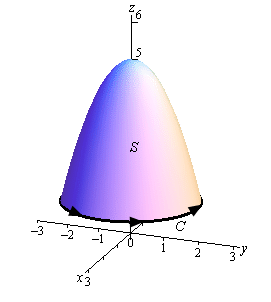

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$  Image from Paul Dawkins lecture notes

**Ex1 solution 1 using ParametricRegion()**

In [4]:
# Vectorfield  
F = z**2*C.i - 3*x*y*C.j + x**3*y**3*C.k

# Closed curve C: the circle of radius 2, z=1
circle = ParametricRegion((2*cos(theta), 2*sin(theta), 1), (theta, 0, 2*pi)) 
                      # ParametricRegion((x,y,z), (interval of integration));  Cylindrical Coordinates

# Line integral along the closed curve C (traversed in the positive direction)
I1 = vector_integrate(F, circle)

print('The line integral and thus the original surface integral is', I1)

The line integral and thus the original surface integral is 0


===================================

**Ex1. solution 2 using matrices**


In [5]:
t = sp.symbols('t', real=True)
x, y, z, F1, F2, F3 = sp.symbols('x y z F_1, F_2, F_3', cls=sp.Function, real=True)

# Coordinates are parameterized:
x = x(t)
y = y(t)
z = z(t)

#Vectorfield:
F1 = F1(x,y,z)
F2 = F2(x,y,z)
F3 = F3(x,y,z)

r = sp.Matrix([x, y, z])                                                    # Path as matrix
F = sp.Matrix([F1, F2, F3])                                                 # Vector field as matrix

# General form for the integrand is obtained according to the definition
integrand = F.dot(sp.diff(r,t))                                             # Inner product of the vectorfield F with dr/dt
                                   
# Place the vector field F and the path r to be integrated
integrand1 = integrand.subs([(F1, z**2),
                             (F2, -3*x*y),
                             (F3, x**3*y**3),
                             (x, 2*cos(t)),
                             (y, 2*sin(t)),
                             (z, 1)]).doit().simplify()

I2 = sp.integrate(integrand1, (t, 0, 2*pi))
print('The line integral and thus the original surface integral is', I2 )

The line integral and thus the original surface integral is 0


=============================

**Ex1. solution 3. Using vector formalism**

The vector field is $ \vec{F} = z^2\vec{i} -3xy\vec{j} +x^3y^3\vec{k} $ and the curve is &nbsp; 
$\vec r\left( t \right) = 2\cos t\,\vec i + 2\sin t\,\vec j + \vec k,\,\,\,\,0 \le t \le 2\pi$

Using Stokes’ Theorem we can write the surface integral as the following line integral.
$$\iint\limits_{S}{{{\mathop{\rm curl}\nolimits} \vec F\,\centerdot \,d\vec S}} = \int\limits_{C}{{\vec F\,\centerdot \,d\,\vec r}} = \int_{{\,0}}^{{\,2\pi }}{{\vec F\left( {\vec r\left( t \right)} \right)\,\centerdot \,\vec r'\left( t \right)\,dt}}$$

In [6]:
# In the in coordinate system C we have
F = z**2*C.i - 3*x*y*C.j + x**3*y**3*C.k                                      # Vector field
F = F.subs([(x, 2*cos(t)), (y, 2*sin(t)), (z, 1)]).doit().simplify()          # Parameterization

r = 2*cos(t)*C.i + 2*sin(t)*C.j + 1*C.k                                       # Position vector r(t) of the curve (circle)
drdt = sp.diff(r)                                                             # r'(t)     

integrand = F.dot(drdt)                                                       # The dot product F(t).r'(t)
I3 = sp.integrate(integrand, (t, 0, 2*pi))                                    # Integration of F(t).r'(t)
print('The line integral and thus the original surface integral is', I3)


The line integral and thus the original surface integral is 0


=================

The above results means that vector field $\vec{F}$  is **consrvative**. It means that $curl\vec{F}  = 0$ and that there is such a **scalar potential P**  that $\vec{F} = \nabla$*P*.  Let's confirm these points for vector field $\vec{F}$ .

In [7]:
from sympy.vector import CoordSys3D, Del, is_conservative, scalar_potential

F = z**2*C.i - 3*x*y*C.j + x**3*y**3*C.k
print('Vector field F is consrvative:', is_conservative(F))                    # Is it true that F is consrvative
print('CurlF = ', Del().cross(F).doit())                                       # CurlF
P = scalar_potential(F, C)
print('The scalar potential P =', P)
print('gradP = F:', gradient(P) == F)

Vector field F is consrvative: True
CurlF =  0
The scalar potential P = C.x*z(t)**2 - 3*C.y*x(t)*y(t) + C.z*x(t)**3*y(t)**3
gradP = F: True


=======================================================================================================================

**Example 2.**  Use Stokes’ Theorem to evaluate  &nbsp; 
$ \displaystyle \int\limits_{C}{{\vec F\,\centerdot \,d\,\vec r}} $ &nbsp; where &nbsp;
$ \vec F = {z^2}\,\vec i + {y^2}\,\vec j + x\,\vec k $  and  *C*  is the triangle with vertices 
(1,0,0), (0,1,0), (0,0,1).

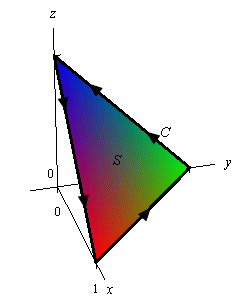

**Ex2. solution 1.**  Using Stoke's Theorem and integrating over the projection of *S* in the xy plane we'll have

\begin{align*}\int\limits_{C}{{\vec F\,\centerdot \,d\,\vec r}} & = \iint\limits_{S}{{{\mathop{\rm curl}\nolimits} \vec F\,\centerdot \,d\vec S}}\\ &  = \iint\limits_{D}{{{\mathop{\rm curl}\nolimits} \vec F\, \centerdot \frac{{\nabla f}}{{\left\| {\nabla f} \right\|}}\,\,\left\| {\nabla f} \right\|\,dA}} \\ &  = \iint\limits_{D}{{{\mathop{\rm curl}\nolimits} \vec F\, \centerdot {\nabla f} \,\,dA}} &  \end{align*}

First we need to calculate  $curl \vec{F}$. Then we need the function *f* defining the surface *S* and its gradient. For integration, we still need the expression of z as a function of x and y and the projection of the surface *S* in the xy plane (region *D*). We get z from the equation f = 0.

In [8]:
# INIT
from sympy.abc import  x, y, z
from sympy.vector import gradient
from sympy.vector import CoordSys3D, Del
C = CoordSys3D('C')

In [9]:
# CURLF
F = C.z**2*C.i + C.y**2*C.j + C.x*C.k                           # Vector field
delxF = Del().cross(F).doit()                                   # Curl(F)
delxF

(2*C.z - 1)*C.j

In [10]:
# THE PLAIN S
P  = C.x*C.i + C.y*C.j + C.z*C.k                                # Position vector to the points of the plane
n = (C.j-C.i).cross(C.k-C.j)                                    # Normal to the plane
f = (P-C.i).dot(n)                                              # Function f defines the surface S with the equation f = 0.
eq = sp.Eq(f, 0)                                                # Equation for the surface S
grad_f = gradient(f)

print('Function for the surface S: f =', f)
print('grad_f =', grad_f )
print('The equation of the plane:')
eq

Function for the surface S: f = C.x + C.y + C.z - 1
grad_f = C.i + C.j + C.k
The equation of the plane:


Eq(C.x + C.y + C.z - 1, 0)

In [11]:
# Z(X,Y)
# When we solve C.z = Cz(C.x, C.y) from the plane equation eq, we can perform the surface..
# integration dS (vector) as a regular double integration dA in the xy plane over the projection
# A of surface S.
zeta = sp.solve(eq, C.z)[0]                         # C.z solved  from the surface equation (first member of the list)
print('C.z =', zeta)                              

C.z = -C.x - C.y + 1


In [12]:
# THE INTEGRAND
integrand = delxF.dot(grad_f)
integrand = integrand.subs([(C.z, zeta)]).doit().simplify()

print(integrand)

-2*C.x - 2*C.y + 1


**The limits of integration for region D in the xy plane.**
We get the equation of the line for the projection *D* in the xy plain by plugging in *z = 0* into the equation of the surface *S*. So based on this the ranges that define *D* in the xy plane the integration limits we'll be
0  ≤ x  ≤1,  &nbsp;   0 ≤ y  ≤ - x + 1. The upper limit of integration of y can also be given to SymPy to calculate:


In [13]:
eq2 = f.subs([(C.z, 0)])                                       # Equation for projection D in the xy plane
y_lim = sp.solve(eq2, C.y)[0]                                  # The upper integration limit for the variable y
y_lim

1 - C.x

In [14]:
I = sp.integrate(integrand, (C.y, 0, y_lim), (C.x, 0, 1)) 
I

-1/6

===========================

**Ex2. solution 2.** SymPy's geometry module gives us an easy way to calculate this line integral directly as the sum of the line integrals of the three segments.

In [15]:
from sympy.geometry import Segment 

F = C.z**2*C.i + C.y**2*C.j + C.x*C.k                          # Vector field

s1 = Segment((1,0,0), (0,1,0))                                 # Line segment
s2 = Segment((0,1,0), (0,0,1))
s3 = Segment((0,0,1), (1,0,0))

I1 = vector_integrate(F, s1)                                   # Line integral 
I2 = vector_integrate(F, s2)
I3 = vector_integrate(F, s3)
I = I1 + I2 + I3                                               # Circulation
I

-1/6

========================================================================================================================
### Practice Problems ###

**Problem 1.** Use Stokes’ Theorem to evaluate  $\displaystyle \iint\limits_{S}{{{\mathop{\rm curl}\nolimits} \vec F\centerdot d\vec S}}$ where $\vec F = y\,\vec i - x\,\vec j + y{x^3}\,\vec k $ and $S$ is the portion of the sphere of radius 4 with $z \ge 0$ and the upwards orientation. 

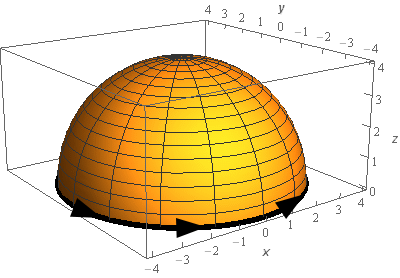

**Solution.** To calculate the integral   $\begin{array}{l}\oint _{C} \vec{F} \cdot \vec{dr} \end{array}$ in SymPy we only need to write down the vectorfield $\vec{F} $, define the curve $C$ (the circle in polar coordinates with limits) and then perform the integration.

In [16]:
F = C.y*C.i -C.x*C.j + C.y*C.x**3*C.k                                            # Vector field

# Closed curve C: the circle of radius 4, z=0 in polar coordinates.
# ParametricRegion((x,y,z), (interval of integration))                           # One parameter  -> curve
curve = ParametricRegion((4*cos(theta), 4*sin(theta), 0), (theta, 0, 2*pi)) 
                          
# Line integral along the closed curve C  (circle traversed in the positive direction)
I = vector_integrate(F, curve)
I

-32*pi

========================================================================================================================

**Problem 2.** Use Stokes' Theorem to evaluate  $\vec{F} = (z^2 -1) \vec{i} + (z + xy^3)\vec{j} + 6 \vec{k} $    and  $S$ is the portion of  where
$x = 6 - 4y^2 -4 z^2$   in front of $x = -2$   with orientation in the negative *x*-axis direction.

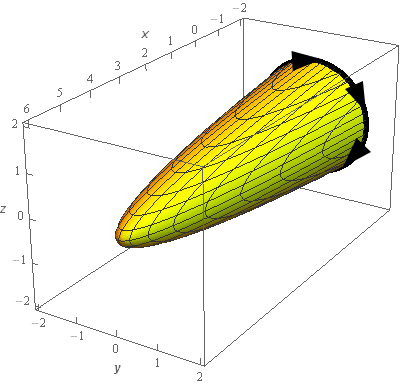

In [17]:
# SOLUTION

F = (C.z**2 -1)*C.i + (C.z + C.x*C.y**3)*C.j + 6*C.k                      # Vector field

# Closed curve C: the circle of radius sqrt(2) in the yz plane (x=0) in polar coordinates.
# ParametricRegion((x,y,z), (interval of integration))                    # One parameter  -> curve       
curve = ParametricRegion((-2, sp.sqrt(2)*sin(theta), sp.sqrt(2)*cos(theta)), (theta, 0, 2*pi)) 
                          
# Line integral along the closed curve C  (circle traversed in the positive direction)
I = vector_integrate(F, curve)
I


2*pi

**Problem 3.** Use Stokes' Theorem to evaluate $\int\limits_{C}{{\vec F\,\centerdot \,d\,\vec r}} \, $  where
$ \,\vec{F} = -yz\vec{i} + (4y + 1)\vec{j} + xy\vec{k}  \,$  and $C$  is the circle of radius 3 at $y = 4$ and perpendicular to the $y$-axis. $C$ has a clockwise rotation if you are looking down the $y$-axis from the positive $y$-axis to the negative $y$-axis. See the figure below for a sketch of the curve.



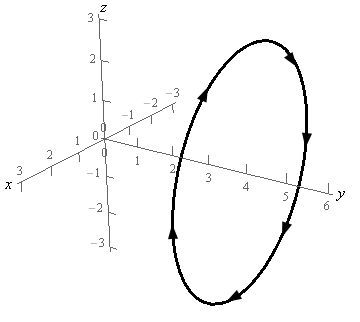

**Solution**. Here we don't need Stokes' because we can easily get the result in three lines of code. It doesn't involve and doesn't teach much math, but it gives the result.


In [18]:
F = -C.y*C.z*C.i + (4*C.y + 1)*C.j + C.x*C.y*C.k
curve = ParametricRegion((3*cos(theta), 4, 3*sin(theta)), (theta, 0, 2*pi))
vector_integrate(F, curve)


72*pi

**Problem 3.** Use Stokes' Theorem to evaluate the line integral $\int\limits_{C}{{\vec F\,\centerdot \,d\,\vec r}} \, $  where
$ \,\vec F = \left( {3y{x^2} + {z^3}} \right)\,\vec i + {y^2}\,\vec j + 4y{x^2}\,\vec k  \,$  and $C$ is triangle with vertices  (0,0,3), (0,2,0), (4,0,0). $C$ has a counter clockwise rotation if you are above the triangle and looking down towards the xy-plane. See the figure below.

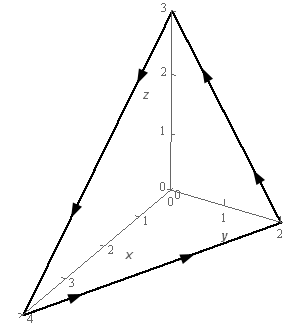

Here the calculation of line integral direct is very easy and short with *Segment* module of *sympy.geometry*. So with SymPy there's there is no point in using the right side of Stoke's theorem here (forming the plane equation, normal, cross and dot products and integration limits; see the Lamar solution).  

In [19]:
from sympy.geometry import Segment 

F = (3*C.y*C.x**2 +C.z**3)*C.i +C.y**2*C.j + 4*C.y*C.x**2*C.k         # Vector field

s1 = Segment((0,0,3), (4,0,0))                                        # Line segment
s2 = Segment((4,0,0), (0,2,0))
s3 = Segment((0,2,0), (0,0,3))

I1 = vector_integrate(F, s1)                                          # Line integral 
I2 = vector_integrate(F, s2)
I3 = vector_integrate(F, s3)
I = I1 + I2 + I3                                                      # Circulation
I

-5

============================

Codes: Heikki Miettinen 2024